In [1]:
%reload_kedro

%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import missingno as msno

                    INFO     Resolved project path as:                                              ]8;id=192090;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=554752;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#164\164]8;;\
                             C:\Users\9509298u\Documents\GitHub\OC_Projects\ocp7-scoring-model-clou                
                             d.                                                                                    
                             To set a different path, run '%reload_kedro <project_root>'                           

[05/01/24 14:10:38] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=858726;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=200704;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=30238;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=42812;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/9509298u/Documents/GitHub/OC_Projects/ocp                           
                             7-scoring-model-cloud/mlruns'                                                         

[05/01/24 14:10:39] INFO     Kedro project ocp7_scoring_model_cloud                                 ]8;id=220383;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=735004;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=894703;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=448672;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=675641;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=994870;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

In [3]:
# Load data

app_test = catalog.load("application_test")

[05/01/24 14:11:11] INFO     Loading data from application_test (CSVDataset)...                 ]8;id=9047;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=200854;file://C:\Users\9509298u\AppData\Local\miniconda3\envs\ocp7-scoring-model-cloud\lib\site-packages\kedro\io\data_catalog.py#483\483]8;;\

In [4]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


<Axes: >

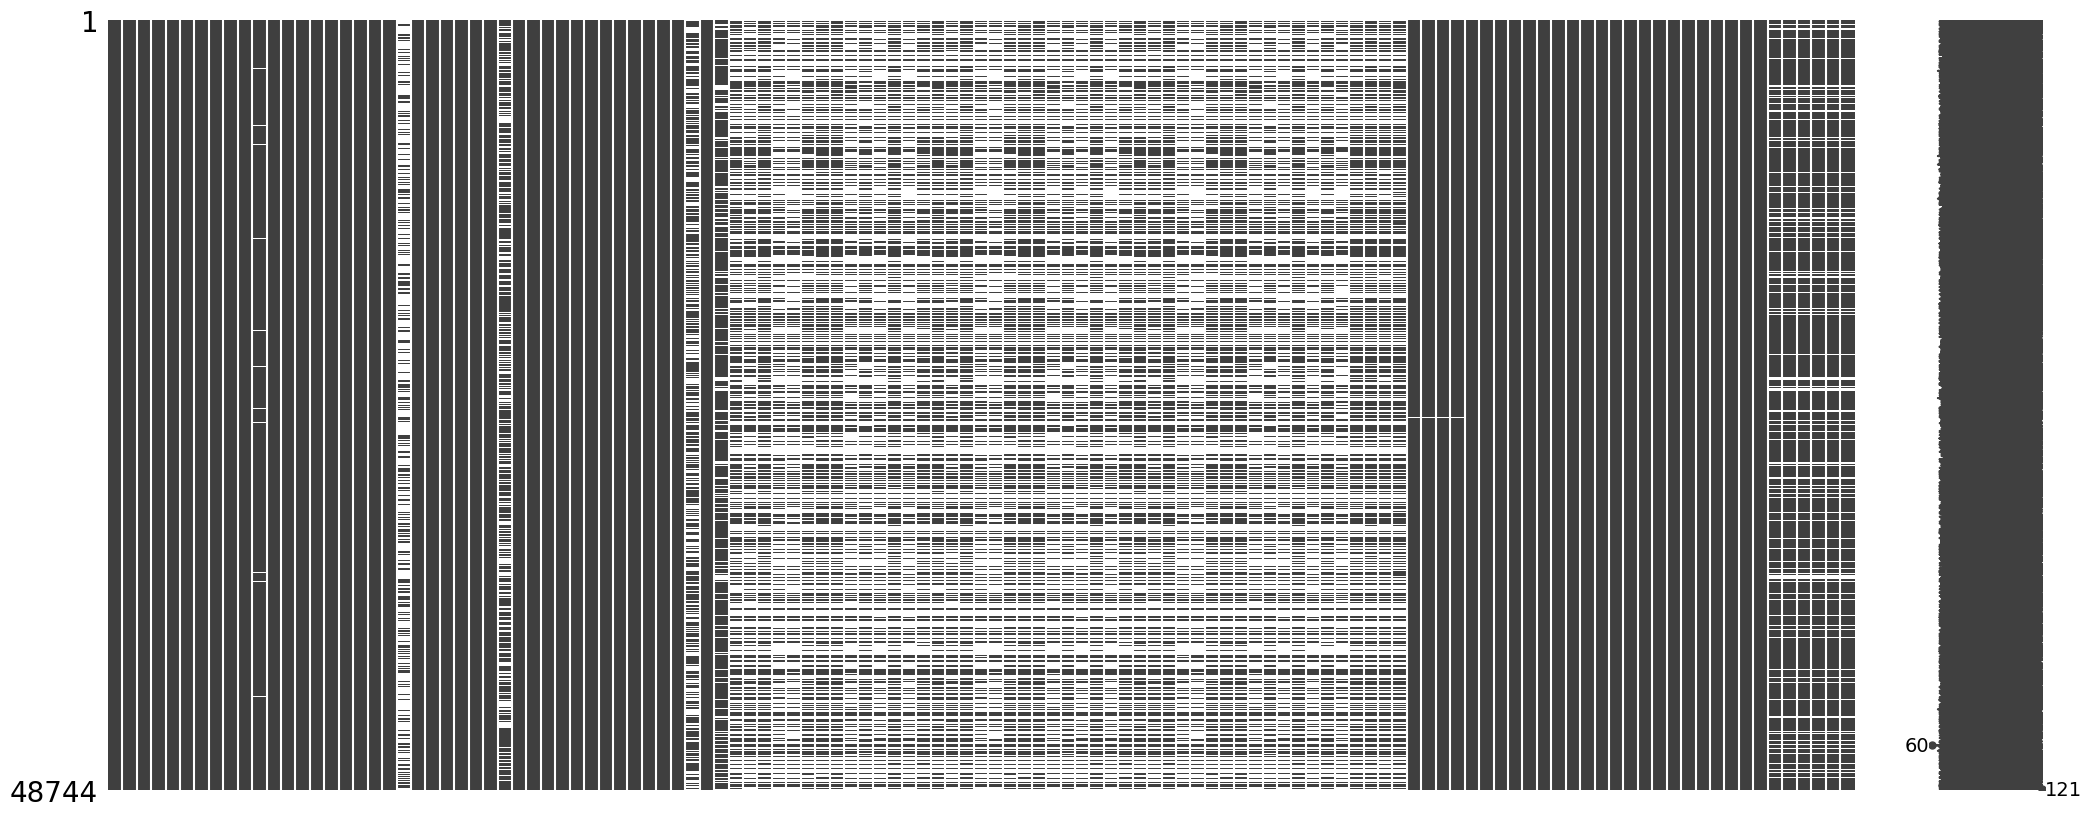

In [5]:
msno.matrix(app_test)